In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("countypres_2000-2024.csv")

In [16]:
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
94404,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3069,3512,20250821,NaN
94405,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,378,3512,20250821,NaN
94406,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,18,3512,20250821,NaN
94407,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OVERVOTES,NaN,1,3512,20250821,NaN


In [17]:
df2 = df.copy()

In [18]:
df2 = df2.drop(columns = ['office', 'state'])

In [19]:
df2

,year,state_po,county_name,county_fips,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,AL,AUTAUGA,1001.0,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,AL,AUTAUGA,1001.0,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,AL,AUTAUGA,1001.0,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,AL,AUTAUGA,1001.0,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,AL,BALDWIN,1003.0,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL
...,...,...,...,...,...,...,...,...,...,...
94404,2024,WY,WESTON,56045.0,DONALD J TRUMP,REPUBLICAN,3069,3512,20250821,NaN
94405,2024,WY,WESTON,56045.0,KAMALA D HARRIS,DEMOCRAT,378,3512,20250821,NaN
94406,2024,WY,WESTON,56045.0,OTHER,OTHER,18,3512,20250821,NaN
94407,2024,WY,WESTON,56045.0,OVERVOTES,NaN,1,3512,20250821,NaN


In [20]:
x = df2.groupby(['year', 'state_po', 'county_name', 'candidate', 'party'])['candidatevotes'].sum()
x = x.reset_index()
y = pd.DataFrame(x)

In [21]:
y['result'] = ' '
y

,year,state_po,county_name,candidate,party,candidatevotes,result
0,2000,AK,DISTRICT 1,AL GORE,DEMOCRAT,1284,
1,2000,AK,DISTRICT 1,GEORGE W. BUSH,REPUBLICAN,4681,
2,2000,AK,DISTRICT 1,OTHER,OTHER,216,
3,2000,AK,DISTRICT 1,RALPH NADER,GREEN,475,
4,2000,AK,DISTRICT 10,AL GORE,DEMOCRAT,2194,
...,...,...,...,...,...,...,...
76973,2024,WY,WASHAKIE,OTHER,OTHER,36,
76974,2024,WY,WESTON,CHASE OLIVER,LIBERTARIAN,47,
76975,2024,WY,WESTON,DONALD J TRUMP,REPUBLICAN,3069,
76976,2024,WY,WESTON,KAMALA D HARRIS,DEMOCRAT,378,


In [22]:
x = y.groupby(['year', 'state_po', 'county_name'])['candidatevotes'].max()
x = pd.DataFrame(x)

fina_df = pd.merge(x, y, on = ['year', 'state_po', 'county_name'])

In [23]:
fina_df

,year,state_po,county_name,candidatevotes_x,candidate,party,candidatevotes_y,result
0,2000,AK,DISTRICT 1,4681,AL GORE,DEMOCRAT,1284,
1,2000,AK,DISTRICT 1,4681,GEORGE W. BUSH,REPUBLICAN,4681,
2,2000,AK,DISTRICT 1,4681,OTHER,OTHER,216,
3,2000,AK,DISTRICT 1,4681,RALPH NADER,GREEN,475,
4,2000,AK,DISTRICT 10,5673,AL GORE,DEMOCRAT,2194,
...,...,...,...,...,...,...,...,...
76973,2024,WY,WASHAKIE,3125,OTHER,OTHER,36,
76974,2024,WY,WESTON,3069,CHASE OLIVER,LIBERTARIAN,47,
76975,2024,WY,WESTON,3069,DONALD J TRUMP,REPUBLICAN,3069,
76976,2024,WY,WESTON,3069,KAMALA D HARRIS,DEMOCRAT,378,


In [24]:
fina_df['total_votes_of_winner'] = fina_df['candidatevotes_x']
fina_df['candidatevotes'] = fina_df['candidatevotes_y']

fina_df = fina_df.drop(columns = ['candidatevotes_y', 'candidatevotes_x'])

In [25]:
fina_df

,year,state_po,county_name,candidate,party,result,total_votes_of_winner,candidatevotes
0,2000,AK,DISTRICT 1,AL GORE,DEMOCRAT,,4681,1284
1,2000,AK,DISTRICT 1,GEORGE W. BUSH,REPUBLICAN,,4681,4681
2,2000,AK,DISTRICT 1,OTHER,OTHER,,4681,216
3,2000,AK,DISTRICT 1,RALPH NADER,GREEN,,4681,475
4,2000,AK,DISTRICT 10,AL GORE,DEMOCRAT,,5673,2194
...,...,...,...,...,...,...,...,...
76973,2024,WY,WASHAKIE,OTHER,OTHER,,3125,36
76974,2024,WY,WESTON,CHASE OLIVER,LIBERTARIAN,,3069,47
76975,2024,WY,WESTON,DONALD J TRUMP,REPUBLICAN,,3069,3069
76976,2024,WY,WESTON,KAMALA D HARRIS,DEMOCRAT,,3069,378


In [26]:
fina_df['result'] = (fina_df['total_votes_of_winner'] == fina_df['candidatevotes']).astype(int)

In [27]:
final_df = fina_df.drop(columns = 'total_votes_of_winner')

In [28]:
final_df

,year,state_po,county_name,candidate,party,result,candidatevotes
0,2000,AK,DISTRICT 1,AL GORE,DEMOCRAT,0,1284
1,2000,AK,DISTRICT 1,GEORGE W. BUSH,REPUBLICAN,1,4681
2,2000,AK,DISTRICT 1,OTHER,OTHER,0,216
3,2000,AK,DISTRICT 1,RALPH NADER,GREEN,0,475
4,2000,AK,DISTRICT 10,AL GORE,DEMOCRAT,0,2194
...,...,...,...,...,...,...,...
76973,2024,WY,WASHAKIE,OTHER,OTHER,0,36
76974,2024,WY,WESTON,CHASE OLIVER,LIBERTARIAN,0,47
76975,2024,WY,WESTON,DONALD J TRUMP,REPUBLICAN,1,3069
76976,2024,WY,WESTON,KAMALA D HARRIS,DEMOCRAT,0,378


Charts

In [29]:
states = final_df.groupby(['year', 'state_po', 'candidate', 'party'])['candidatevotes'].sum()
states = pd.DataFrame(states)
states = states.reset_index()

In [30]:
states

,year,state_po,candidate,party,candidatevotes
0,2000,AK,AL GORE,DEMOCRAT,79004
1,2000,AK,GEORGE W. BUSH,REPUBLICAN,167398
2,2000,AK,OTHER,OTHER,10381
3,2000,AK,RALPH NADER,GREEN,28747
4,2000,AL,AL GORE,DEMOCRAT,695602
...,...,...,...,...,...
1244,2024,WV,OTHER,OTHER,11478
1245,2024,WY,CHASE OLIVER,LIBERTARIAN,4193
1246,2024,WY,DONALD J TRUMP,REPUBLICAN,192633
1247,2024,WY,KAMALA D HARRIS,DEMOCRAT,69527


In [31]:
years = final_df.groupby(['year', 'candidate', 'party'])['candidatevotes'].sum()
years = pd.DataFrame(years)
years = years.reset_index()

In [32]:
years

,year,candidate,party,candidatevotes
0,2000,AL GORE,DEMOCRAT,51001968
1,2000,GEORGE W. BUSH,REPUBLICAN,50457896
2,2000,OTHER,OTHER,1068557
3,2000,RALPH NADER,GREEN,2882954
4,2004,GEORGE W. BUSH,REPUBLICAN,61931981
5,2004,JOHN KERRY,DEMOCRAT,58899063
6,2004,OTHER,OTHER,1489505
7,2008,BARACK OBAMA,DEMOCRAT,69448278
8,2008,JOHN MCCAIN,REPUBLICAN,59928695
9,2008,OTHER,OTHER,1810364


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [87]:
years_dict = {2000:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0, 0]},
              2004:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2008:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2012:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2016:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0]},
              2020:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0, 0.05, 0, 0]},
              2024:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0, 0]}}

for i, row in years.iterrows():
  for x in years_dict:
    if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
      years_dict[x]["candidates"].append(row[1])
      years_dict[x]["parties"].append(row[2])
      years_dict[x]["votes"].append(row[3])
      if row[2] == "DEMOCRAT":
        years_dict[x]["colors"].append("CornflowerBlue")
      elif row[2] == "REPUBLICAN":
        years_dict[x]["colors"].append("Crimson")
      elif row[2] == "GREEN":
        years_dict[x]["colors"].append("DarkGreen")
      elif row[2] == "LIBERTARIAN":
        years_dict[x]["colors"].append("DarkGray")
      else:
        years_dict[x]["colors"].append("BurlyWood")

/tmp/ipython-input-4227822006.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
/tmp/ipython-input-4227822006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["candidates"].append(row[1])
/tmp/ipython-input-4227822006.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["parties"].append(row[2])
/tmp/ipython-input-4227822006.py:

In [68]:
years_dict

{2000: {'candidates': ['AL GORE', 'GEORGE W. BUSH', 'OTHER', 'RALPH NADER'],
  'parties': ['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'GREEN'],
  'votes': [51001968, 50457896, 1068557, 2882954],
  'colors': ['CornflowerBlue', 'Crimson', 'BurlyWood', 'DarkGreen'],
  'explode': [0.1, 0, 0, 0]},
 2004: {'candidates': ['GEORGE W. BUSH', 'JOHN KERRY', 'OTHER'],
  'parties': ['REPUBLICAN', 'DEMOCRAT', 'OTHER'],
  'votes': [61931981, 58899063, 1489505],
  'colors': ['Crimson', 'CornflowerBlue', 'BurlyWood'],
  'explode': [0.1, 0, 0]},
 2008: {'candidates': ['BARACK OBAMA', 'JOHN MCCAIN', 'OTHER'],
  'parties': ['DEMOCRAT', 'REPUBLICAN', 'OTHER'],
  'votes': [69448278, 59928695, 1810364],
  'colors': ['CornflowerBlue', 'Crimson', 'BurlyWood'],
  'explode': [0.1, 0, 0]},
 2012: {'candidates': ['BARACK OBAMA', 'MITT ROMNEY', 'OTHER'],
  'parties': ['DEMOCRAT', 'REPUBLICAN', 'OTHER'],
  'votes': [65753019, 60666387, 2629510],
  'colors': ['CornflowerBlue', 'Crimson', 'BurlyWood'],
  'explode': [0.1, 0, 0

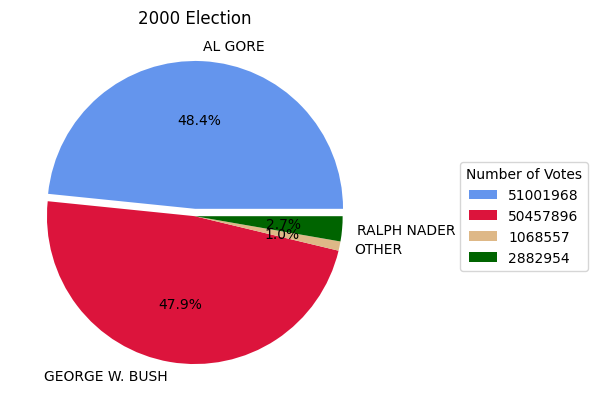

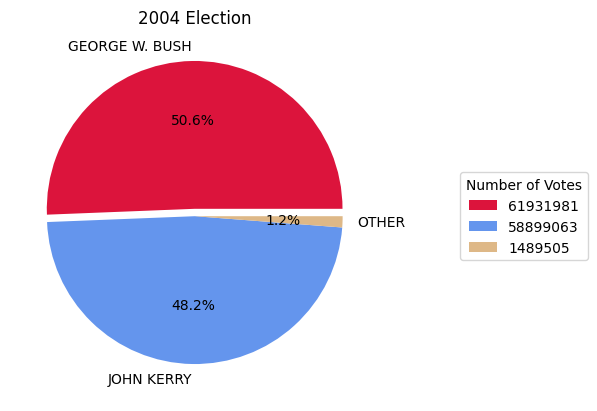

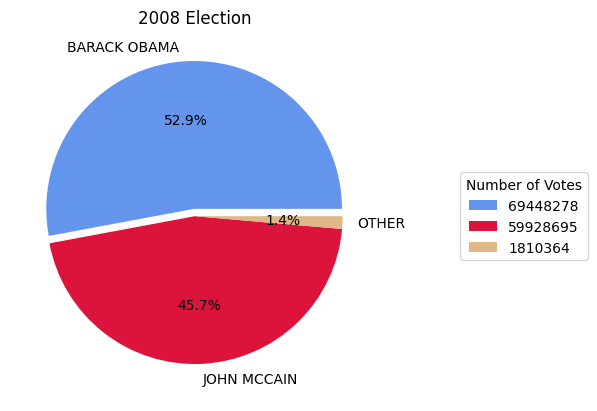

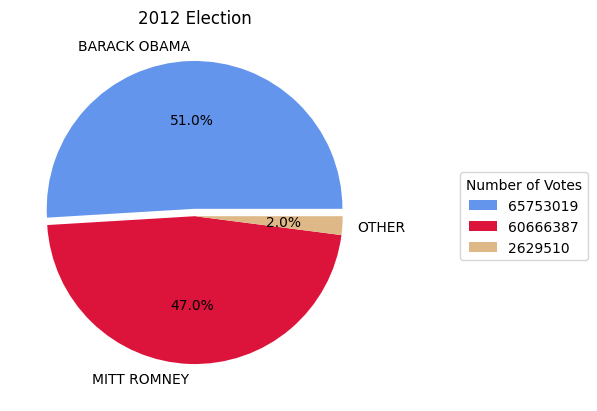

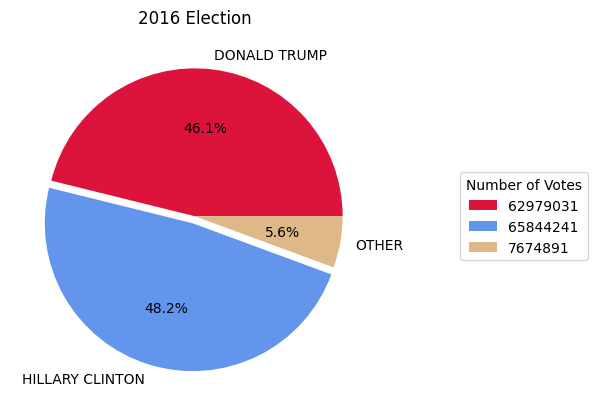

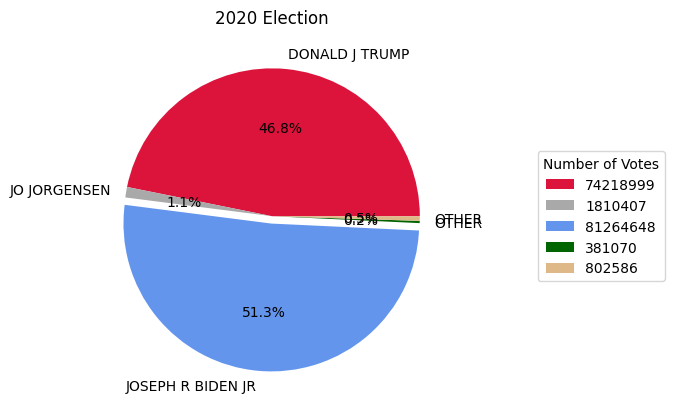

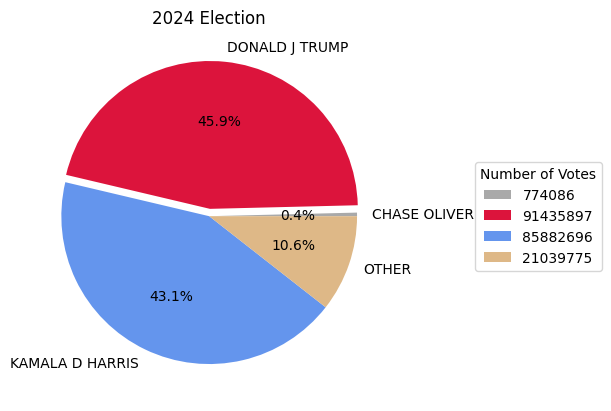

In [88]:
for x in years_dict:
  fig, ax = plt.subplots()
  ax.set_title(f"{x} Election")
  ax.pie(years_dict[x]["votes"],
         labels= years_dict[x]["candidates"],
         colors=years_dict[x]["colors"],
         explode=years_dict[x]["explode"],
         autopct='%1.1f%%')
  # ax.legend(years_dict[x]["parties"],
  #           title = "Parties",
  #           loc="center left",
  #           bbox_to_anchor=(1.5, 0, 0.5, 1))
  ax.legend(years_dict[x]["votes"],
            title="Number of Votes",
            loc="center left",
            bbox_to_anchor=(1.2, 0, 0.5, 1))
  plt.show()